In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import tqdm


 # What's a Convolution?

 Gonna make a convolutional neural net

In [2]:
raw_data = pd.read_csv("data/fe_data.csv", index_col=[1])
raw_data.head(22)


,GameId,Unnamed: 0,Team,X,Y,S,A,Orientation,Dir,Season,...,Formation_SINGLEBACK,Formation_WILDCAT,PlayerBMI,TimeDelta,PlayerAge,IsRusher,YardsLeft,IsOffense,YardLine_adj,X_adj
PlayId,,,,,,,,,,,,,,,,,,,,,
20170907000118,2017090700,0,False,46.09,34.84,4.0,1.13,278.01,182.82,2017,...,0,0,28.749228,1.0,28.692760,False,35,False,35,1.09
20170907000118,2017090700,1,False,45.33,32.64,0.1,1.35,332.39,161.30,2017,...,0,0,35.993600,1.0,28.457305,False,35,False,35,0.33
20170907000118,2017090700,2,False,46.00,33.20,3.1,0.59,356.99,157.27,2017,...,0,0,33.744000,1.0,28.629790,False,35,False,35,1.00
20170907000118,2017090700,3,False,48.54,27.70,0.2,0.54,0.23,254.36,2017,...,0,0,30.619556,1.0,34.795430,False,35,False,35,3.54
20170907000118,2017090700,4,False,50.68,35.42,1.6,2.43,347.37,195.69,2017,...,0,0,27.935571,1.0,30.061685,False,35,False,35,5.68
20170907000118,2017090700,5,False,44.94,24.00,1.8,0.32,51.66,264.99,2017,...,0,0,32.351351,1.0,26.475101,False,35,False,35,-0.06
20170907000118,2017090700,6,False,45.89,16.64,0.2,0.83,2.77,37.41,2017,...,0,0,26.496727,1.0,25.311514,False,35,False,35,0.89
20170907000118,2017090700,7,False,46.63,18.73,1.3,0.74,31.48,89.96,2017,...,0,0,26.172647,1.0,26.431295,False,35,False,35,1.63
20170907000118,2017090700,8,False,63.37,26.90,2.8,1.86,15.30,304.69,2017,...,0,0,26.702703,1.0,27.512746,False,35,False,35,18.37


In [3]:
print('\n'.join(raw_data.columns))


GameId
Unnamed: 0
Team
X
Y
S
A
Orientation
Dir
Season
YardLine
Quarter
GameClock
Down
Distance
HomeScoreBeforePlay
VisitorScoreBeforePlay
DefendersInTheBox
PlayDirection
Yards
PlayerHeight
PlayerWeight
Week
DefendersInTheBox_vs_Distance
HomePossession
Field_eq_Possession
HomeField
Formation_ACE
Formation_EMPTY
Formation_I_FORM
Formation_JUMBO
Formation_PISTOL
Formation_SHOTGUN
Formation_SINGLEBACK
Formation_WILDCAT
PlayerBMI
TimeDelta
PlayerAge
IsRusher
YardsLeft
IsOffense
YardLine_adj
X_adj


In [4]:
keep_columns = ["IsOffense","IsRusher","X","Y","S","A","Dir","Yards"]
data = raw_data[keep_columns]
data.head()


,IsOffense,IsRusher,X,Y,S,A,Dir,Yards
PlayId,,,,,,,,
20170907000118,False,False,46.09,34.84,4.0,1.13,182.82,8
20170907000118,False,False,45.33,32.64,0.1,1.35,161.30,8
20170907000118,False,False,46.00,33.20,3.1,0.59,157.27,8
20170907000118,False,False,48.54,27.70,0.2,0.54,254.36,8
20170907000118,False,False,50.68,35.42,1.6,2.43,195.69,8


 Filter out incomplete plays which don't have data for all players.

In [5]:
indices = data.index.unique()

wrong_shape = []
for i in tqdm(indices):
    if data.loc[i].shape != (22,len(keep_columns)):
        wrong_shape.append(i)

data = data.drop(wrong_shape)
data.shape


100%|██████████| 30703/30703 [00:23<00:00, 1323.75it/s]


(674938, 8)

 Let's engineer the components of each player's velocity. First we need to
 understand how to interpret the `Dir` variable.

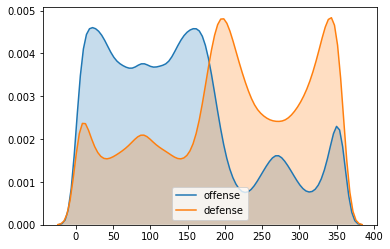

In [6]:
sns.kdeplot(data.loc[data.IsOffense,'Dir'], shade=True, label='offense')
sns.kdeplot(data.loc[~data.IsOffense,'Dir'], shade=True, label='defense')
plt.legend()
plt.show()


 Because the offense is usually pushing toward positive X, we can understand
 that $S_x = S \times sin(Dir)$

In [7]:
dir_rad = np.deg2rad(data.Dir)
S_x = data.S * np.sin(dir_rad)
S_y = -data.S * np.cos(dir_rad)

data['S_x'] = S_x
data['S_y'] = S_y


 We can verify that we're correctly assigning the x speed by comparing offense
 and defense. Offense should generally have a positive x speed while defense
 should have a negative one.

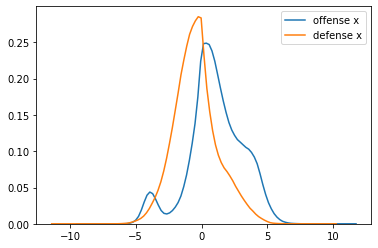

In [8]:
sns.kdeplot(S_x.loc[data.IsOffense], label='offense x')
sns.kdeplot(S_x.loc[~data.IsOffense], label='defense x')
plt.legend()
plt.show()


 We break down the dataframe into a list of dataframes, where each entry
 contains a dataframe representing a play. We then convert them to numpy
 matrices, so that the first dimension is the play, second is the player, third
 is the feature.

 We have to `expand_dims` for the rusher because numpy squeezes out the player
 dimension and we want it to have the same dimensionality as the other arrays.

In [9]:
# Split data into play lists
cols = ['X', 'Y', 'S_x', 'S_y']

off_axis = 1 # the axis along which the offensive player changes
def_axis = 2 # the axis along which the defensive player changes

# Split offense and defense data
off_data = data.loc[data.IsOffense & ~data.IsRusher, cols]
def_data = data.loc[~data.IsOffense, cols]
rus_data = data.loc[data.IsRusher, cols]

split_plays = lambda df: [df.loc[i,:] for i in tqdm(df.index.unique())]

#plays = split_plays(data)
off_plays = split_plays(off_data)
def_plays = split_plays(def_data)
rus_plays = split_plays(rus_data)

off_m = np.array([df.values for df in off_plays])
def_m = np.array([df.values for df in def_plays])
rus_m = np.array([df.values for df in rus_plays])

# Expand and repeat arrays to match shapes
off_m = np.expand_dims(off_m, axis=def_axis).repeat(11, def_axis)
def_m = np.expand_dims(def_m, axis=off_axis).repeat(10, off_axis)

rus_m = np.expand_dims(rus_m, off_axis).repeat(10, off_axis)
rus_m = np.expand_dims(rus_m, def_axis).repeat(11, def_axis)

print("Offense data shape", off_m.shape)
print("Defense data shape", def_m.shape)
print("Rusher data shape", rus_m.shape)


100%|██████████| 30679/30679 [00:07<00:00, 4123.88it/s]
Offense data shape (30679, 10, 11, 4)
Defense data shape (30679, 10, 11, 4)
Rusher data shape (30679, 10, 11, 4)


 ## Feature Engineering

 Now we engineer specific features from the columns we collected. The shape of
 our "image" is 10 offensive players x 11 defensive players. We will represent
 scalar features, such as those for the rusher, as a constant values across the
 matrix and 1-D features as repeating across the appropriate axis.

 ### Defender Velocity

 This layer consists of two features:

 - defender $S_x$
 - defender $S_y$

 It does not include any information about the offense.

In [10]:
# Defender velocity feature
def_vel = def_m[:,:,:,2:]
def_vel.shape


(30679, 10, 11, 2)

 ### Offense-Defense layer

 These features compare the (x,y) positions of the offensive and defensive
 players. This builds three features:

 - x distance
 - y distance
 - x relative speed
 - y relative speed
 - euclidean distance

 This way the model is trained on both the absolute euclidean distance (so it
 doesn'have to calculate that) as well as each of its components, which
 preserve directionality as well.

In [11]:
# X and Y components of relative position and velocity
off_def_rel_comp = off_m - def_m

# Euclidean distance
off_def_ed = np.sqrt(np.square(off_def_rel_comp[:,:,:,:2]).sum(axis=3))
off_def_ed = np.expand_dims(off_def_ed, 3)

off_def = np.concatenate([off_def_rel_comp, off_def_ed], axis=3)
off_def.shape


(30679, 10, 11, 5)

 ### Defender vs. Rusher

 The distances from the defenders to the rusher. Three features:

 - x distance
 - y distance
 - x relative speed
 - y relative speed
 - euclidean distance

 The procedure is similar to the offensive vs. defensive positions

In [12]:
# Components speed & velocity
def_rus_rel_comp = def_m - rus_m

# Euclidean distance
def_rus_ed = np.sqrt(np.square(def_rus_rel_comp[:,:,:,:2]).sum(axis=3))
def_rus_ed = np.expand_dims(def_rus_ed, 3)

def_rus = np.concatenate([def_rus_rel_comp, def_rus_ed], axis=3)
def_rus.shape


(30679, 10, 11, 5)

In [13]:
target = data.loc[data.IsRusher, "Yards"]

def pdf(n):
    arr = [0] * 199
    arr[n+99] = 1
    return arr

features = [
    def_vel,
    off_def,
    def_rus
]

x = np.concatenate(features, axis=3)
y = np.array(list(target.map(pdf)), dtype=np.float32)

print("X shape:", x.shape)
print("Y shape:", y.shape)


X shape: (30679, 10, 11, 12)
Y shape: (30679, 199)


 ## Build model
 We use three layers of 2D convolution

In [14]:
def compile_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(x.shape[1:], name='input'),
        tf.keras.layers.Conv2D(64, kernel_size=(1,1), strides=(1,1), activation='relu'),
        tf.keras.layers.Conv2D(64, kernel_size=(1,1), strides=(1,1), activation='relu'),
        tf.keras.layers.Conv2D(64, kernel_size=(1,1), strides=(1,1), activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(1,10)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu', name='d_relu'),
        tf.keras.layers.Dense(199, activation='softmax')
    ])

    mse = tf.keras.losses.MeanSquaredError()
    def pdf_CRPS(y_true_pdf, y_pred_pdf):
        y_true_cdf = tf.math.cumsum(y_true_pdf, axis=1)
        y_pred_cdf = tf.math.cumsum(y_pred_pdf, axis=1)

        return mse(y_true_cdf, y_pred_cdf)

    model.compile(optimizer='adam', loss=pdf_CRPS)
    return model

model = compile_model()
history = model.fit(x,y, epochs=5)


Train on 30679 samples
Epoch 1/5
30679/30679 [==============================] - 17s 556us/sample - loss: 0.0146
Epoch 2/5
30679/30679 [==============================] - 17s 562us/sample - loss: 0.0127
Epoch 3/5
30679/30679 [==============================] - 17s 542us/sample - loss: 0.0124
Epoch 4/5
30679/30679 [==============================] - 16s 514us/sample - loss: 0.0122
Epoch 5/5
30679/30679 [==============================] - 16s 517us/sample - loss: 0.0121


 ## Training Report

loss
0  0.014639
1  0.012692
2  0.012366
3  0.012177
4  0.012084


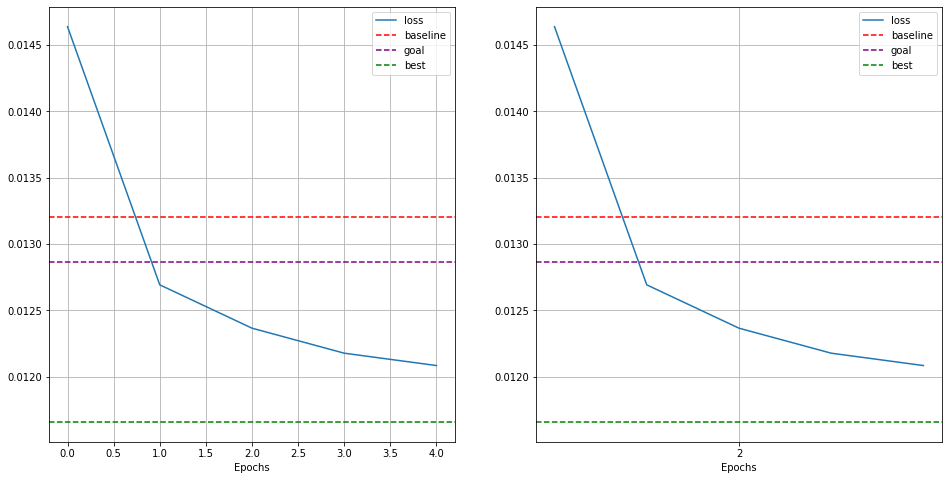

In [15]:
hist = pd.DataFrame(history.history)
fig, axes = plt.subplots(1,2, figsize=(16,8))
baseline_mse = 0.013200
goal_mse = 0.012864
best_mse = 0.011658

for start,ax in zip([0,-10], axes):
    ax.plot(hist.loss[start:], label='loss')
    #ax.plot(hist.val_loss[start:], label='val_loss')

    ax.axhline(baseline_mse, label='baseline', c='red', ls='--')
    ax.axhline(goal_mse, label='goal', c='purple', ls='--')
    ax.axhline(best_mse, label='best', c='green', ls='--')
    
    ax.legend()
    ax.grid()

    ax.set_xlabel("Epochs")

axes[1].set_xticks(np.arange(start % hist.index.max(), hist.index.max(), 2))

print(hist.tail(5))
fig.show()
